In [213]:
#importation des packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [214]:
#chargement des données
data = pd.read_csv("Book1.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [215]:
data.shape

(45211, 17)

In [216]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


ANALYSE DES DONNEES

In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [218]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [219]:
data["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [220]:
data["marital"].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [221]:
data["education"].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [222]:
data["default"].unique()

array(['no', 'yes'], dtype=object)

In [223]:
data["housing"].unique()

array(['yes', 'no'], dtype=object)

In [224]:
data["loan"].unique()

array(['no', 'yes'], dtype=object)

In [225]:
data["contact"].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [226]:
data["month"].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [227]:
data["poutcome"].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [228]:
data["y"].unique()

array(['no', 'yes'], dtype=object)

TRAITEMENT DES DONNES

In [229]:

labeling_IP_dst= LabelEncoder()
data["job"]= labeling_IP_dst.fit_transform(data["job"])
data["marital"]= labeling_IP_dst.fit_transform(data["marital"])
data["education"]= labeling_IP_dst.fit_transform(data["education"])
data["default"]= labeling_IP_dst.fit_transform(data["default"])
data["housing"]= labeling_IP_dst.fit_transform(data["housing"])
data["loan"]= labeling_IP_dst.fit_transform(data["loan"])
data["contact"]= labeling_IP_dst.fit_transform(data["contact"])
data["month"]= labeling_IP_dst.fit_transform(data["month"])
data["poutcome"]= labeling_IP_dst.fit_transform(data["poutcome"])
data["y"]= labeling_IP_dst.fit_transform(data["y"])

In [230]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
5,35,4,1,2,0,231,1,0,2,5,8,139,1,-1,0,3,0
6,28,4,2,2,0,447,1,1,2,5,8,217,1,-1,0,3,0
7,42,2,0,2,1,2,1,0,2,5,8,380,1,-1,0,3,0
8,58,5,1,0,0,121,1,0,2,5,8,50,1,-1,0,3,0
9,43,9,2,1,0,593,1,0,2,5,8,55,1,-1,0,3,0


In [231]:
data["job"].unique()

array([ 4,  9,  2,  1, 11,  5,  0,  7,  6, 10,  3,  8])

In [232]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0
45210,37,2,1,1,0,2971,0,0,0,17,9,361,2,188,11,1,0


MATRICE DE CORELATION 

<Axes: >

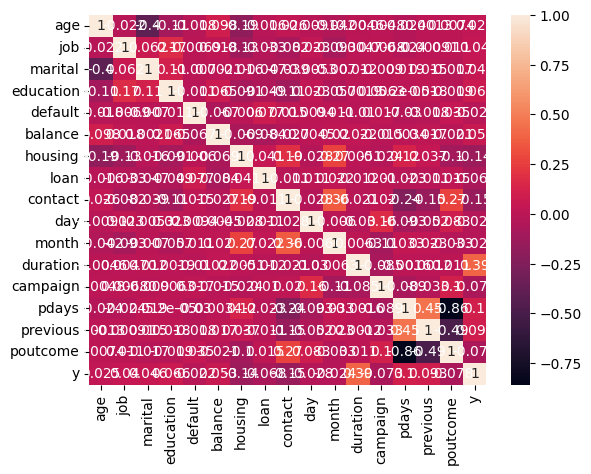

In [233]:
sns.heatmap(data.corr(),annot=True)

In [234]:
data.corr().y.sort_values(ascending=False)

y            1.000000
duration     0.394521
pdays        0.103621
previous     0.093236
education    0.066241
balance      0.052838
marital      0.045588
job          0.040438
age          0.025155
default     -0.022419
month       -0.024471
day         -0.028348
loan        -0.068185
campaign    -0.073172
poutcome    -0.077840
housing     -0.139173
contact     -0.148395
Name: y, dtype: float64

SEPARATION DES DONNEES (TRAIN & TEST)

In [235]:
#variable independante
X = data.iloc[ : , :-1]
#Variable dependante
y = data.iloc[ : , -1]

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=35)

In [237]:
print("X-train Shape:", X_train.shape)
print("y-train Shape:", y_train.shape)
print("X-test Shape:", X_test.shape)
print("y-test Shape:", y_test.shape)

X-train Shape: (31647, 16)
y-train Shape: (31647,)
X-test Shape: (13564, 16)
y-test Shape: (13564,)


In [238]:
data.shape

(45211, 17)

In [239]:
#standardisation des données
#scaler = StandardScaler()

#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [240]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
57,47,1,1,3,0,306,1,0,2,5,8,13,1,-1,0,3
32584,24,1,1,1,0,9,1,1,0,17,0,468,1,-1,0,3
38362,31,0,0,1,0,-254,1,0,0,15,8,237,2,-1,0,3
44798,38,4,1,2,0,1477,0,0,0,15,11,385,3,769,2,0
32885,30,4,2,2,0,3392,1,0,0,17,0,194,2,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19705,32,4,2,2,0,474,1,0,0,7,1,90,3,-1,0,3
15808,28,0,2,1,0,579,1,0,0,21,5,60,2,-1,0,3
19391,58,5,1,1,0,4,0,1,0,6,1,147,1,-1,0,3
41911,28,4,2,2,0,80,0,0,0,20,10,676,2,146,2,0


In [241]:
models = [RandomForestClassifier(),
         DecisionTreeClassifier(),
         KNeighborsClassifier(),
         LogisticRegression()
        ]

In [242]:
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model}\n")
    print("Precision_score =", precision_score(y_test, y_pred))
    print("Recall_score =", recall_score(y_test, y_pred))
    print("F1_score =", f1_score(y_test, y_pred))
    print(f"accuracy_score = {accuracy_score(y_test, y_pred)}\n")

RandomForestClassifier()

Precision_score = 0.6601239669421488
Recall_score = 0.40037593984962405
F1_score = 0.4984399375975039
accuracy_score = 0.9051902093777646

DecisionTreeClassifier()

Precision_score = 0.44318895166352795
Recall_score = 0.4423558897243108
F1_score = 0.442772028849169
accuracy_score = 0.8689914479504571

KNeighborsClassifier()

Precision_score = 0.5130023640661938
Recall_score = 0.2719298245614035
F1_score = 0.35544635544635544
accuracy_score = 0.8839575346505456

LogisticRegression()

Precision_score = 0.5684210526315789
Recall_score = 0.16917293233082706
F1_score = 0.2607436021245775
accuracy_score = 0.8871276909466234



In [243]:
model_random = RandomForestClassifier()
model_random.fit(X_train, y_train)

RandomForestClassifier()

Text(0.5, 1.0, 'Matrice de confusion ')

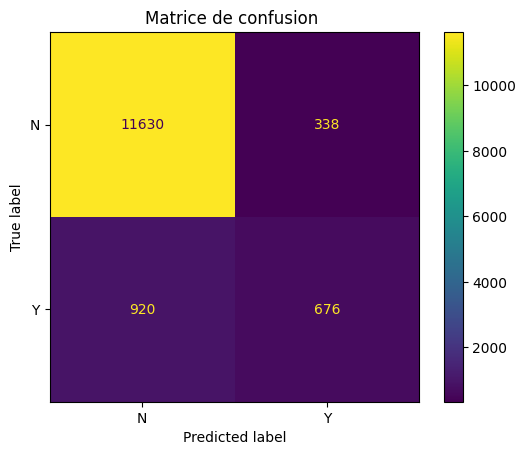

In [244]:
ConfusionMatrixDisplay.from_estimator(model_random, X_test, y_test, display_labels=['N', 'Y'])
plt.title('Matrice de confusion ')

Text(0.5, 1.0, 'Matrice de confusion ')

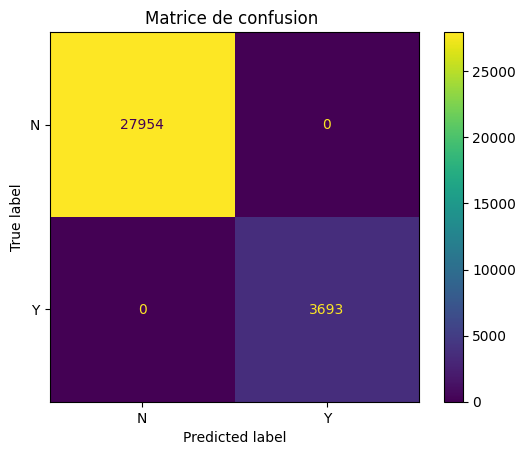

In [245]:
ConfusionMatrixDisplay.from_estimator(model_random, X_train, y_train, display_labels=['N', 'Y'])
plt.title('Matrice de confusion ')